*  Import library

In [109]:
import os
import joblib
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import  OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

* `Load data`

In [4]:
file_path = os.path.join(os.getcwd(), '..', 'dataset' , 'churn-data.csv')
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'] , inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

* `EDA`

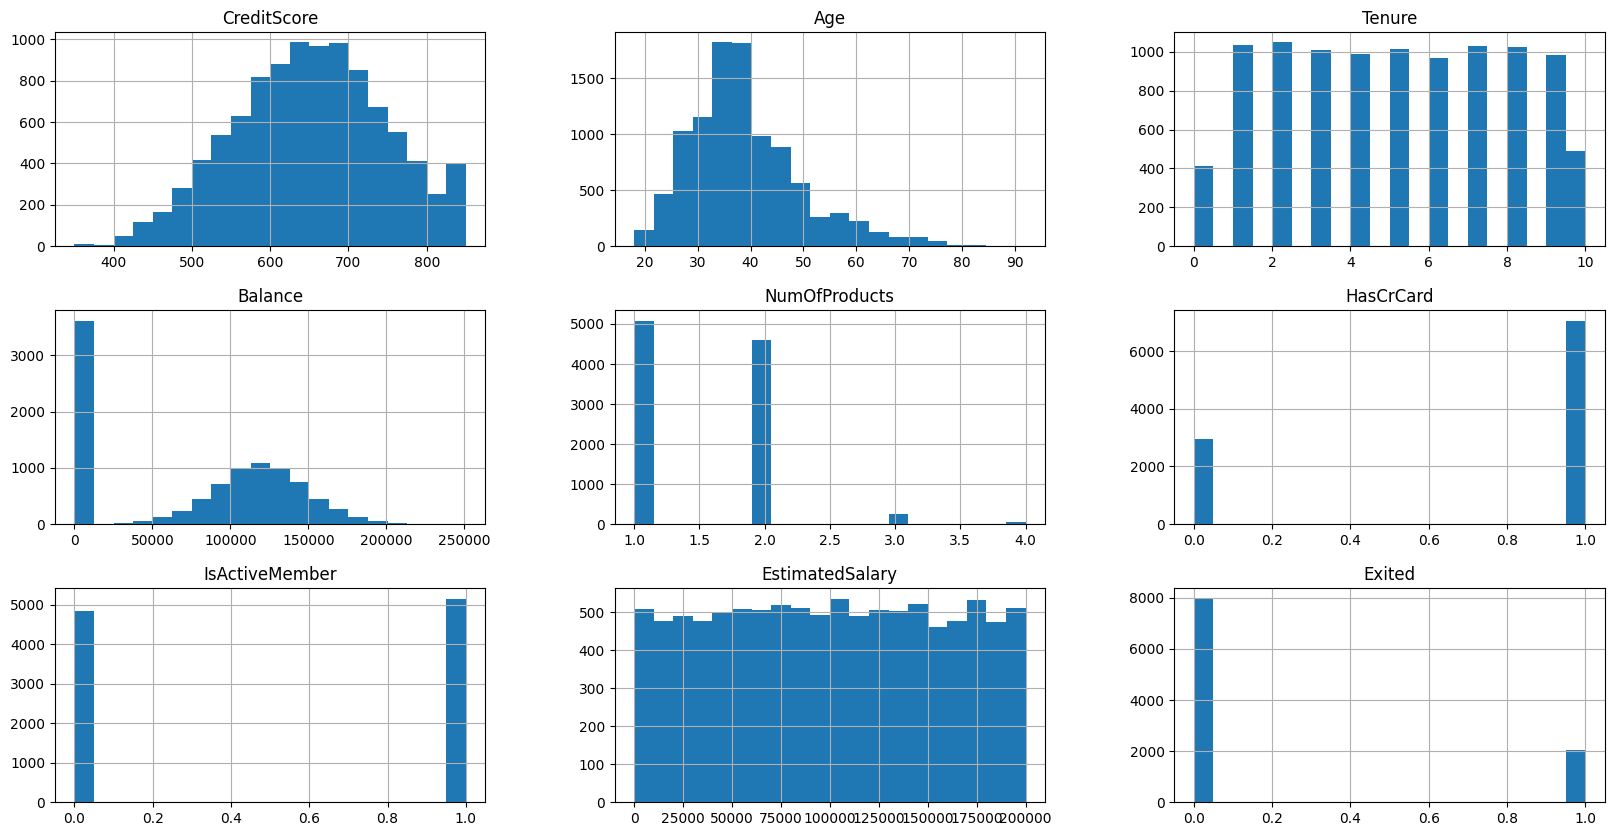

In [9]:
df.hist(bins = 20 , figsize=(20, 10))
plt.show()

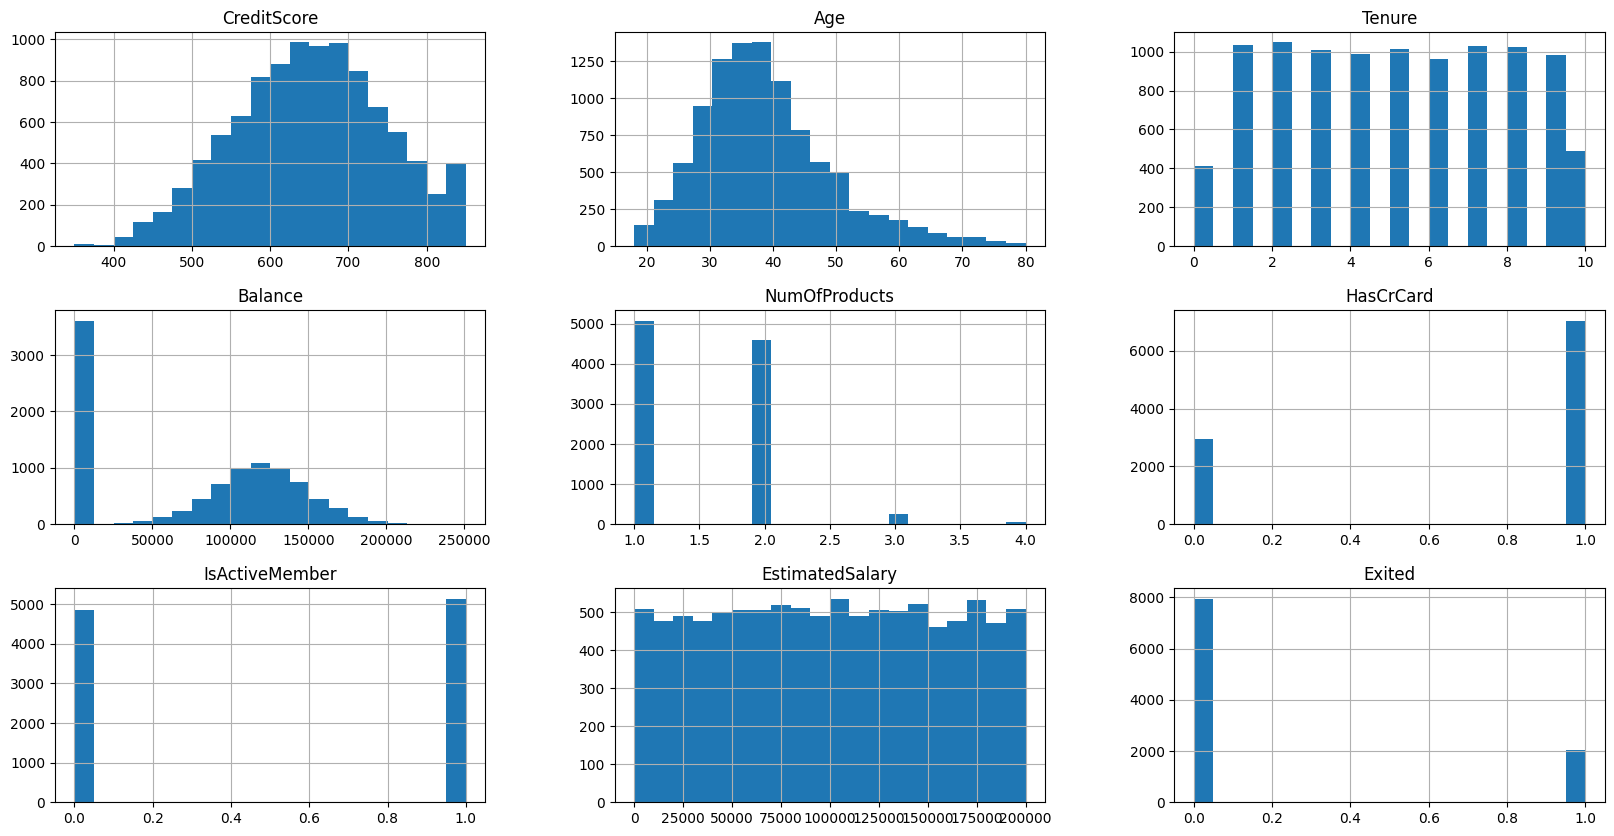

In [10]:
df.drop(index = df[df['Age'] > 80 ].index.tolist(), axis = 0, inplace= True)
df.hist(bins = 20, figsize=(20, 10))
plt.show()

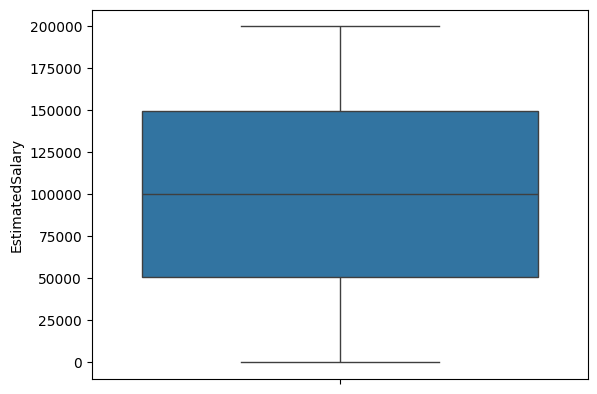

In [12]:
sns.boxplot(data = df, y = 'EstimatedSalary')
plt.show()

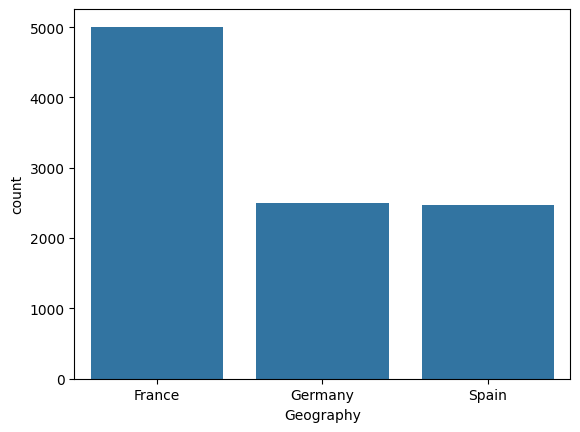

In [14]:
sns.countplot(data = df, x = 'Geography', order = df['Geography'].value_counts().index.tolist())
plt.show()

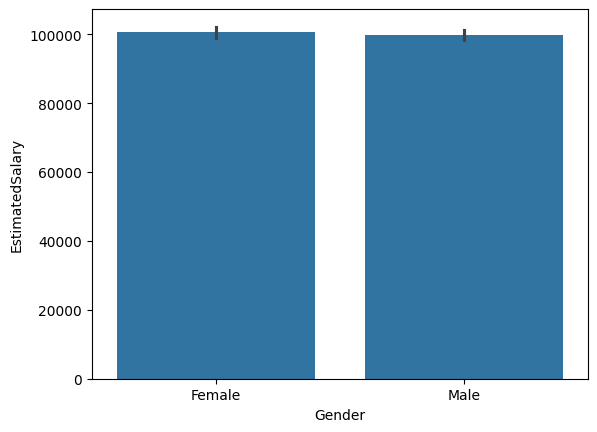

In [17]:
sns.barplot(data= df,y= 'EstimatedSalary' ,x = 'Gender', estimator='mean')
plt.show()

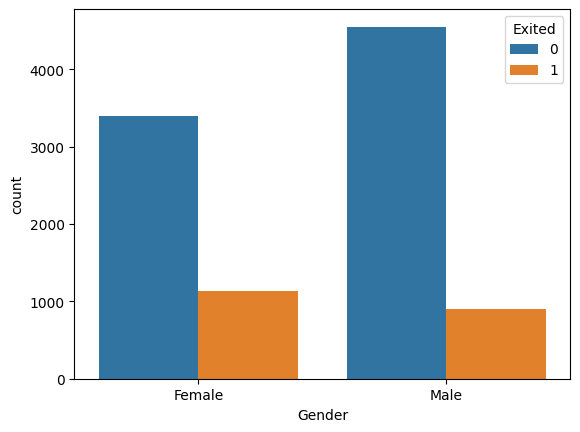

In [19]:
sns.countplot(data =df, x = 'Gender' , hue = 'Exited')
plt.show()

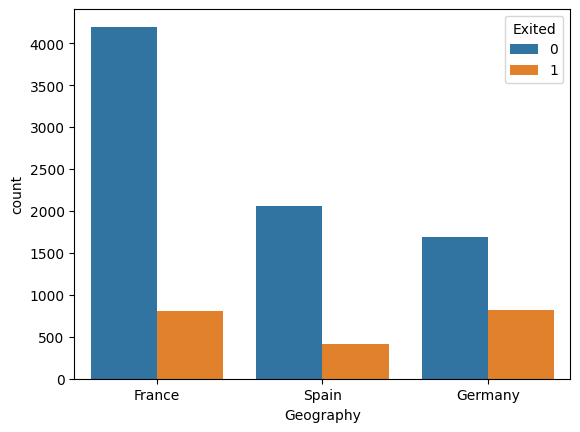

In [20]:
sns.countplot(data = df, x = 'Geography', hue = 'Exited')
plt.show()

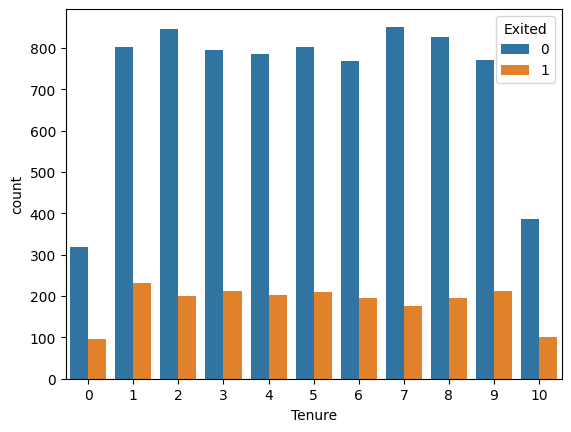

In [21]:
sns.countplot(data =df, x ='Tenure', hue= 'Exited' )
plt.show()

 * `split data`

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=45, stratify=y)


* `Feature Selection`

In [ ]:
num_cols = ['CreditScore', 'Age','Balance', 'EstimatedSalary']
cat_cols = ['Gender', 'Geography']
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(cat_cols))

_, p_val = f_classif(X = X_train[num_cols], y = y_train)
p_val


array([9.12989970e-002, 1.15359217e-149, 3.56368021e-025, 6.16127881e-001])

In [35]:
_, p_val = chi2(X = OrdinalEncoder().fit_transform(X_train[cat_cols]), y =y_train )
p_val

array([5.13986341e-10, 1.56448286e-03])

In [36]:
_, p_val = chi2(X =X_train[ready_cols], y= y_train)
p_val

array([6.36015039e-02, 6.55133468e-02, 7.15759804e-22, 6.69284702e-01])

* `Pipeline`

In [44]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False,drop="first"))
])

ready_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_cols),
    ('categorical', cat_pipeline, cat_cols),
    ('ready', ready_pipeline, ready_cols)
])

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

X_train_final.shape, y_train.shape, X_test_final.shape, y_test.shape


((7990, 11), (7990,), (1998, 11), (1998,))

* `imbalned data`

In [48]:
value_count = 1 - (np.bincount(y_train) / len(y_train))
value_count = value_count / sum(value_count)

class_weights = {}

for i in range(2):
    class_weights[i] = value_count[i]

class_weights

{0: np.float64(0.20387984981226537), 1: np.float64(0.7961201501877346)}

In [51]:
over = SMOTE(k_neighbors=5, random_state=45, sampling_strategy=0.7)
X_train_resample, y_train_resample = over.fit_resample(X_train_final,y_train)

In [54]:
models_path = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(preprocessor, os.path.join(models_path, 'preprocessor.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Churn\\notebooks\\..\\models\\preprocessor.pkl']

* `LogisticRegression`

In [79]:
#Imbalanced
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_final, y_train)

y_train_predicted_log = log_clf.predict(X_train_final)
y_test_predicted_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_train, y_train_predicted_log)
score_test_log = f1_score(y_test, y_test_predicted_log)

score_train_log, score_test_log

(0.3088838268792711, 0.375)

In [80]:
#Weights
log_clf = LogisticRegression(C=1.5,class_weight=class_weights)
log_clf.fit(X_train_final, y_train)

y_train_predicted_log = log_clf.predict(X_train_final)
y_test_predicted_log = log_clf.predict(X_test_final)
score_train_log = f1_score(y_train, y_train_predicted_log)
score_test_log = f1_score(y_test, y_test_predicted_log)

score_train_log, score_test_log

(0.4981380065717415, 0.499151103565365)

In [81]:
#SMOTE
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_resample, y_train_resample)

y_train_predicted_log = log_clf.predict(X_train_final)
y_test_predicted_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_train, y_train_predicted_log)
score_test_log = f1_score(y_test, y_test_predicted_log)

score_train_log, score_test_log

(0.49742895805142084, 0.5042016806722689)

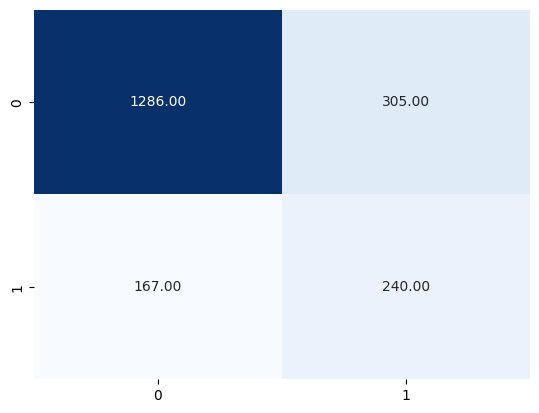

In [74]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_test_predicted_log), cmap='Blues', annot=True,cbar=False , fmt='.2f')
plt.show()

In [75]:
print(classification_report(y_true=y_test, y_pred=y_test_predicted_log))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1591
           1       0.44      0.59      0.50       407

    accuracy                           0.76      1998
   macro avg       0.66      0.70      0.67      1998
weighted avg       0.79      0.76      0.78      1998



* `RandomForest`

In [86]:
#Imbalanced
RF_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
RF_clf.fit(X_train_final, y_train)

y_train_predicted_RF = RF_clf.predict(X_train_final)
y_test_predicted_RF = RF_clf.predict(X_test_final)

score_train_RF = f1_score(y_train, y_train_predicted_RF)
score_test_RF = f1_score(y_test, y_test_predicted_RF)

score_train_RF, score_test_RF

(0.517555266579974, 0.5138888888888888)

In [ ]:
#Weights
RF_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=class_weights)
RF_clf.fit(X_train_final, y_train)

y_train_predicted_RF = RF_clf.predict(X_train_final)
y_test_predicted_RF = RF_clf.predict(X_test_final)

score_train_RF = f1_score(y_train, y_train_predicted_RF)
score_test_RF = f1_score(y_test, y_test_predicted_RF)

score_train_RF, score_test_RF

(0.6003996003996004, 0.5819265143992055)

In [87]:
#SMOTE
RF_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
RF_clf.fit(X_train_resample, y_train_resample)
y_train_predicted_RF = RF_clf.predict(X_train_final)
y_test_predicted_RF = RF_clf.predict(X_test_final)

score_train_RF = f1_score(y_train, y_train_predicted_RF)
score_test_RF = f1_score(y_test, y_test_predicted_RF)

score_train_RF, score_test_RF

(0.6181698485845951, 0.5914396887159533)

In [ ]:
#tuning
RF_base_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=class_weights)

params_grid = {
    'n_estimators' : np.arange(50,400,50),
    'max_depth' : np.arange(6,10,2)
               } 

grid_RF = GridSearchCV(estimator= RF_base_clf,param_grid=params_grid, cv =5 , n_jobs=-1, verbose=4, scoring='f1') 
grid_RF.fit(X_train_final,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


,estimator,RandomForestC...ndom_state=45)
,param_grid,"{'max_depth': array([6, 8]), 'n_estimators': array([ 50, 1...50, 300, 350])}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(250)


In [91]:
grid_RF.best_score_, grid_RF.best_params_

(np.float64(0.6127502614977189),
 {'max_depth': np.int64(8), 'n_estimators': np.int64(250)})

In [92]:
RF_tuned = grid_RF.best_estimator_

y_train_predicted_RFtuned = RF_tuned.predict(X_train_final)
y_test_predicted_RFtuned = RF_tuned.predict(X_test_final)

score_train_RFtuned = f1_score(y_train, y_train_predicted_RFtuned)
score_test_RFtuned = f1_score(y_test, y_test_predicted_RFtuned)

score_train_RFtuned, score_test_RFtuned

(0.6786009363811623, 0.6105032822757112)

In [93]:
joblib.dump(RF_tuned, os.path.join(models_path, 'RF_tuned.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Churn\\notebooks\\..\\models\\RF_tuned.pkl']

In [104]:
features = [name.split('__')[1] for name in preprocessor.get_feature_names_out()]
RF_importance = pd.DataFrame({'feature': features, 'importance': RF_tuned.feature_importances_}).sort_values('importance', ascending=False)
RF_importance

,feature,importance
1,Age,0.373379
8,NumOfProducts,0.244340
2,Balance,0.093283
9,IsActiveMember,0.069461
5,Geography_Germany,0.057541
0,CreditScore,0.050123
3,EstimatedSalary,0.049657
7,Tenure,0.027339
4,Gender_Male,0.020638
6,Geography_Spain,0.007155


* `XGBoost`

In [ ]:
#simple XGB
xgb_base_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=5, 
                                 learning_rate=0.1, n_estimators=150, random_state=42)
xgb_base_model.fit(X_train_final, y_train)

y_train_predicted_xgb =  xgb_base_model.predict(X_train_final)
y_test_predicted_xgb =  xgb_base_model.predict(X_test_final)

score_train_xgb = f1_score(y_true=y_train, y_pred=y_train_predicted_xgb)
score_test_xgb = f1_score(y_true=y_test, y_pred=y_test_predicted_xgb)

score_train_xgb, score_test_xgb

(0.7040293040293041, 0.5931445603576752)

In [110]:
#tuning 
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = class_weights / np.sum(class_weights)
weight_dict = dict(zip(np.unique(y_train), class_weights))

sample_weights = np.array([weight_dict[y] for y in y_train])


In [111]:
xgb_base_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=5, reg_lambda=5,
                                 learning_rate=0.1, n_estimators=150, random_state=4)

param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
}


random_search_xgb = RandomizedSearchCV(estimator=xgb_base_model, param_distributions=param_dist, 
                                       cv=5, n_jobs=-1, n_iter=25, scoring='f1', random_state=48)
random_search_xgb.fit(X_train_final, y_train, sample_weight=sample_weights)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'min_child_weight': [1, 3, ...], ...}"
,n_iter,25
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,48
,error_score,nan


In [112]:
xgb_tuned = random_search_xgb.best_estimator_   

y_pred_train_xgboost_tuned = xgb_tuned.predict(X_train_final)
y_pred_test_xgboost_tuned = xgb_tuned.predict(X_test_final)

score_train_xgb_tuned = f1_score(y_train, y_pred_train_xgboost_tuned)
score_test_xgb_tuned = f1_score(y_test, y_pred_test_xgboost_tuned)

score_train_xgb_tuned ,score_test_xgb_tuned

(0.625343664083979, 0.6068292682926829)

In [113]:
joblib.dump(xgb_tuned, os.path.join(models_path, 'xgb_tuned.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Churn\\notebooks\\..\\models\\xgb_tuned.pkl']